In [20]:
!pip install neattext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.2 MB/s eta 0:00:00


In [22]:
!pip install whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=342b7160f05aa8aca79bf5cd9b8d1409e08d18433aec7bf67518550e6bdae7a4
  Stored in directory: /root/.cache/pip/wheels/21/65/ee/4e6672aabfa486d3341a39a04f8f87c77e5156149299b5a7d0
Successfully built whisper


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import re
import string
import whisper  # For speech to text (optional)
import time
import warnings
warnings.filterwarnings('ignore')

Emotion Detection System
Creating synthetic data for demonstration...
Training model...
Model trained in 0.07 seconds
Model Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       1.0
        fear       0.00      0.00      0.00       0.0
         joy       0.00      0.00      0.00       2.0
        love       0.00      0.00      0.00       1.0
     sadness       0.00      0.00      0.00       0.0
    surprise       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



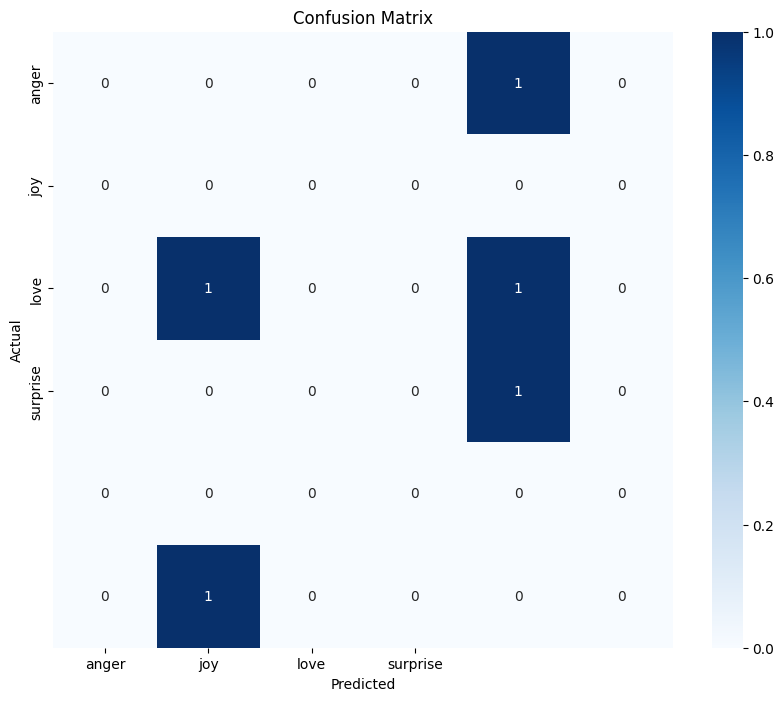


Demo with sample texts:

Text: I just got promoted at work! I'm thrilled!
Predicted emotion: fear


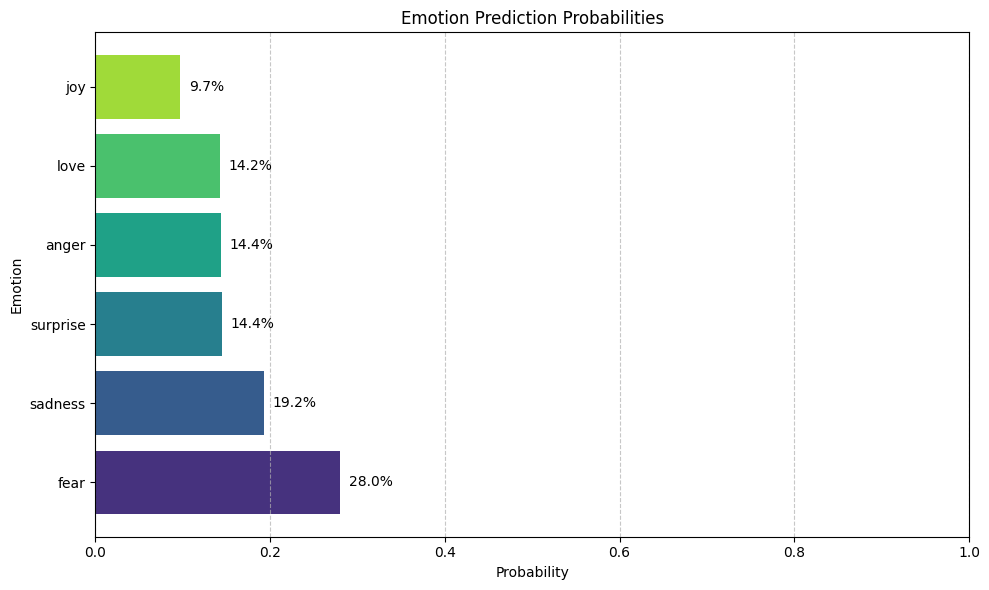


Text: The news of my grandmother's illness devastated me.
Predicted emotion: sadness


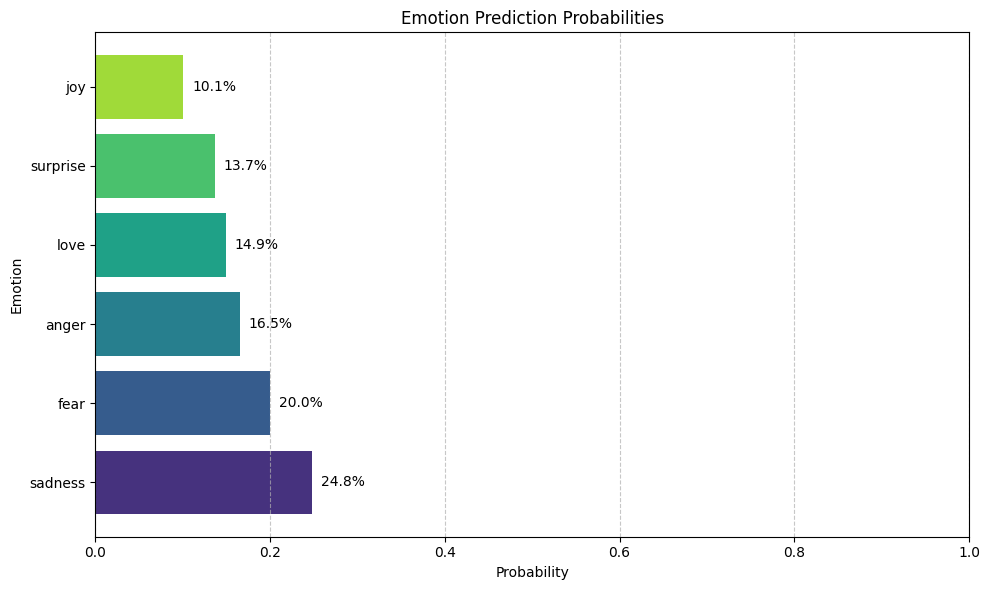


Text: When I saw what they did to my car, I lost my temper.
Predicted emotion: sadness


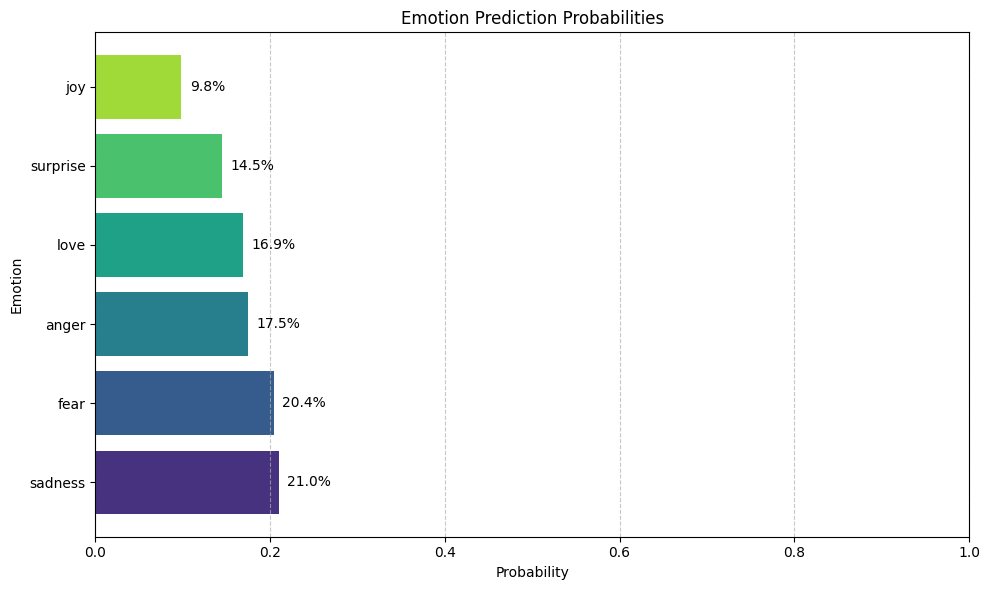


Text: The dark alley made me nervous and frightened.
Predicted emotion: fear


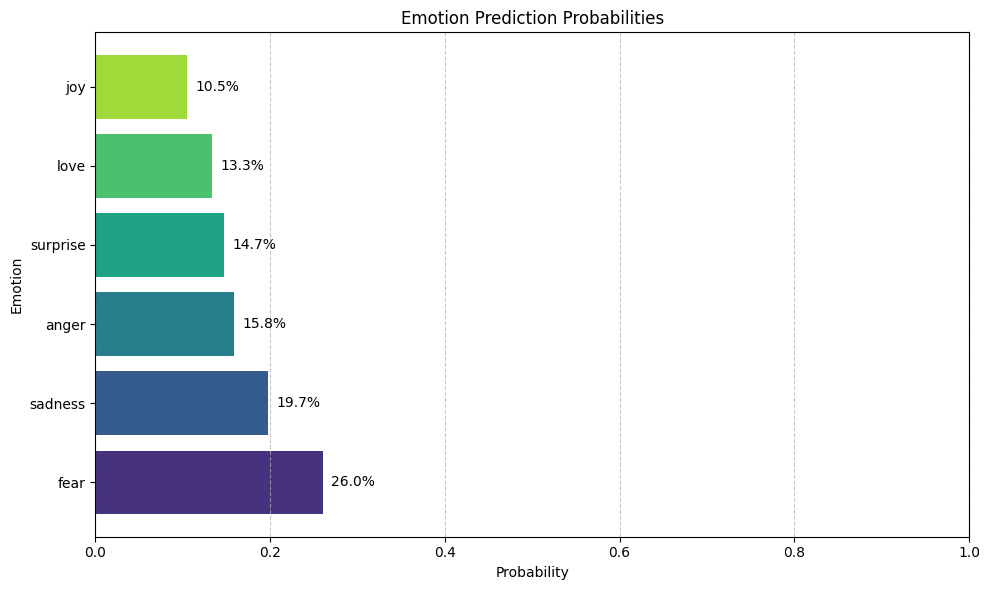


Text: Your support means everything to me, I adore you.
Predicted emotion: sadness


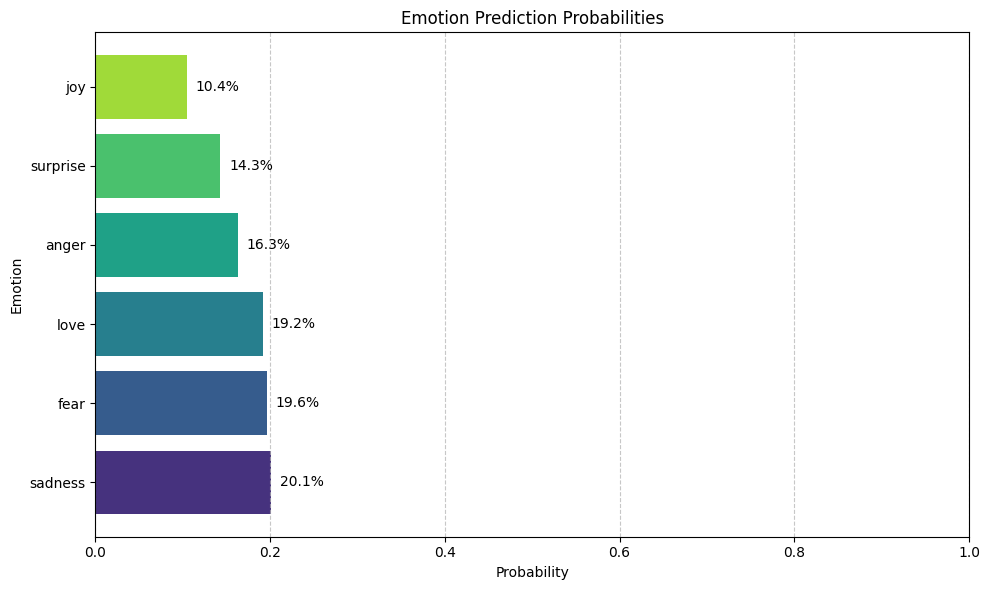


Text: I couldn't believe my eyes when I saw the unexpected gift.
Predicted emotion: surprise


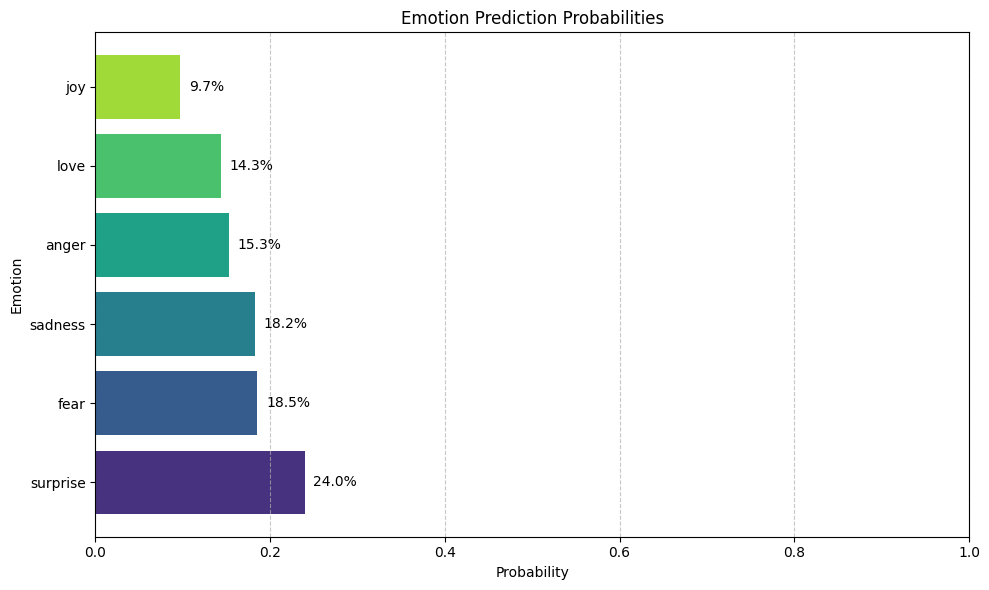

Model saved to emotion_detector_model.joblib

Done! You can now use the emotion detection system for your texts.

Enter a text to analyze (or 'q' to quit): I am sad
Predicted emotion: sadness


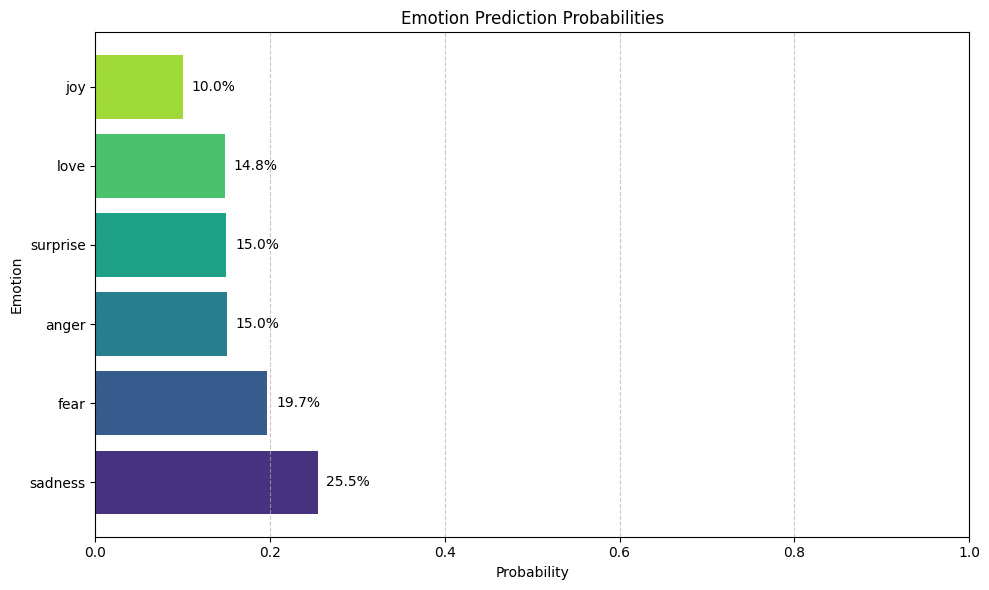

In [ ]:
class EmotionDetector:
    def __init__(self):
        """Initialize the Emotion Detection System"""
        self.emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']
        self.pipeline = None
        self.vectorizer = None
        self.classifier = None
        self.model_ready = False

    def load_data(self, filepath=None):
        """Load emotion dataset or create synthetic data if filepath is None"""
        if filepath:
            df = pd.read_csv(filepath)
            print(f"Loaded dataset with {len(df)} samples")
            return df
        else:
            # Create synthetic data for demonstration
            print("Creating synthetic data for demonstration...")
            texts = [
                "I'm so happy today! Everything is wonderful.",
                "I feel sad and depressed about what happened.",
                "This is making me so angry and frustrated!",
                "I'm terrified and scared of what might happen.",
                "I love you so much! You're amazing.",
                "Wow! That was unexpected and surprising!",
                "The party was amazing and I had so much fun.",
                "I cried all night, feeling so hopeless.",
                "I want to scream and break things right now!",
                "I'm shaking with fear, this is horrifying.",
                "Your kindness makes my heart full of love.",
                "I gasped when I saw the plot twist!",
                "This beautiful day fills me with joy.",
                "The news left me in despair and sorrow.",
                "His betrayal has filled me with rage.",
                "The dark shadows make me anxious and afraid.",
                "Being with you makes me feel loved and cherished.",
                "The unexpected gift was a pleasant surprise.",
                "Success brings joy and fulfillment to life.",
                "Memories of loss bring deep sadness.",
                "Injustice fuels my anger towards the system.",
                "Unknown sounds in the night spark fear.",
                "Compassion and kindness foster love.",
                "Life's twists and turns bring many surprises."
            ]
            emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise'] * 4

            # Create DataFrame
            df = pd.DataFrame({
                'text': texts,
                'emotion': emotions
            })

            return df

    def preprocess_text(self, text):
        """Clean and preprocess text for analysis"""
        # Convert to lowercase
        text = text.lower()

        # Remove special characters, numbers, punctuations
        text = nfx.remove_special_characters(text)
        text = nfx.remove_numbers(text)
        text = nfx.remove_punctuations(text)

        # Remove extra whitespace
        text = re.sub(' +', ' ', text)
        text = text.strip()

        return text

    def prepare_data(self, df):
        """Prepare data for model training"""
        # Clean the text
        df['clean_text'] = df['text'].apply(self.preprocess_text)

        # Create features and target
        X = df['clean_text']
        y = df['emotion']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test

    def build_model(self):
        """Build the emotion detection model"""
        # Create a pipeline with TF-IDF vectorizer and Logistic Regression
        self.vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
        self.classifier = LogisticRegression(C=1.0, max_iter=1000)

        self.pipeline = Pipeline([
            ('tfidf', self.vectorizer),
            ('classifier', self.classifier)
        ])

    def train_model(self, X_train, y_train):
        """Train the emotion detection model"""
        print("Training model...")
        start_time = time.time()
        self.pipeline.fit(X_train, y_train)
        self.model_ready = True
        print(f"Model trained in {time.time() - start_time:.2f} seconds")

    def evaluate_model(self, X_test, y_test):
        """Evaluate the model performance"""
        if not self.model_ready:
            print("Model not trained yet. Please train the model first.")
            return

        # Make predictions
        y_pred = self.pipeline.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        print(f"Model Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(report)

        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=sorted(set(y_test)),
                   yticklabels=sorted(set(y_test)))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    def predict_emotion(self, text):
        """Predict emotion from input text"""
        if not self.model_ready:
            print("Model not trained yet. Please train the model first.")
            return None

        # Preprocess the text
        clean_text = self.preprocess_text(text)

        # Make prediction
        emotion = self.pipeline.predict([clean_text])[0]

        # Get probability scores
        proba = self.pipeline.predict_proba([clean_text])[0]

        # Create dictionary of emotion probabilities
        emotion_probs = {self.pipeline.classes_[i]: prob for i, prob in enumerate(proba)}

        return emotion, emotion_probs

    def visualize_prediction(self, emotion_probs):
        """Visualize emotion prediction probabilities"""
        # Sort probabilities for better visualization
        emotions = list(emotion_probs.keys())
        probs = list(emotion_probs.values())

        # Sort by probability values (descending)
        sorted_idx = np.argsort(probs)[::-1]
        emotions = [emotions[i] for i in sorted_idx]
        probs = [probs[i] for i in sorted_idx]

        # Create horizontal bar chart
        plt.figure(figsize=(10, 6))
        colors = sns.color_palette("viridis", len(emotions))
        bars = plt.barh(emotions, probs, color=colors)

        # Add percentage labels
        for bar, prob in zip(bars, probs):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                    f'{prob:.1%}', va='center')

        plt.xlabel('Probability')
        plt.ylabel('Emotion')
        plt.title('Emotion Prediction Probabilities')
        plt.xlim(0, 1.0)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def save_model(self, filepath='emotion_detector_model.joblib'):
        """Save the trained model to a file"""
        if not self.model_ready:
            print("Model not trained yet. Please train the model first.")
            return

        joblib.dump(self.pipeline, filepath)
        print(f"Model saved to {filepath}")

    def load_model(self, filepath='emotion_detector_model.joblib'):
        """Load a trained model from a file"""
        try:
            self.pipeline = joblib.load(filepath)
            self.model_ready = True
            print(f"Model loaded from {filepath}")
        except FileNotFoundError:
            print(f"Model file {filepath} not found. Please train and save a model first.")

    def speech_to_text(self, audio_file):
        """Convert speech to text using Whisper (optional)"""
        try:
            # Load the Whisper model (tiny is fastest but less accurate)
            model = whisper.load_model("tiny")

            # Transcribe audio
            result = model.transcribe(audio_file)
            transcribed_text = result["text"]

            print("Transcribed text:", transcribed_text)
            return transcribed_text
        except Exception as e:
            print(f"Error processing audio: {e}")
            return None

def main():
    """Main function to demonstrate the emotion detection system"""
    print("=" * 50)
    print("Emotion Detection System")
    print("=" * 50)

    # Initialize detector
    detector = EmotionDetector()

    # Load and prepare data
    data = detector.load_data()  # Using synthetic data
    X_train, X_test, y_train, y_test = detector.prepare_data(data)

    # Build and train model
    detector.build_model()
    detector.train_model(X_train, y_train)

    # Evaluate model
    detector.evaluate_model(X_test, y_test)

    # Demo with sample texts
    print("\nDemo with sample texts:")
    sample_texts = [
        "I just got promoted at work! I'm thrilled!",
        "The news of my grandmother's illness devastated me.",
        "When I saw what they did to my car, I lost my temper.",
        "The dark alley made me nervous and frightened.",
        "Your support means everything to me, I adore you.",
        "I couldn't believe my eyes when I saw the unexpected gift."
    ]

    for text in sample_texts:
        print("\nText:", text)
        emotion, emotion_probs = detector.predict_emotion(text)
        print(f"Predicted emotion: {emotion}")
        detector.visualize_prediction(emotion_probs)

    # Save model for future use
    detector.save_model()

    print("\nDone! You can now use the emotion detection system for your texts.")

    # Optional: Interactive mode
    while True:
        user_input = input("\nEnter a text to analyze (or 'q' to quit): ")
        if user_input.lower() == 'q':
            break

        emotion, emotion_probs = detector.predict_emotion(user_input)
        print(f"Predicted emotion: {emotion}")
        detector.visualize_prediction(emotion_probs)

if __name__ == "__main__":
    main()